In [1]:
import numpy as np
from numba import jit
def yeet(*args, **kwargs):
    return jit(*args, **kwargs)
from tqdm import trange
from dask.distributed import Client, LocalCluster
import matplotlib.pyplot as plt

In [2]:
def mcheck(steps, N):
    prob = np.zeros(steps)
    for i in range(N):
        sig = 0
        k=1
        num = 0
        while sig==0:
            num+= np.random.uniform(-1, 1)
            sig = np.sign(num)
            k+=1
        k=0
        while k<steps:
            num += np.random.uniform(-1, 1)
            if np.sign(num) != sig:
                prob[k] +=1
                break
            k+=1
        
    return prob
fast_mcheck = yeet(mcheck)

In [3]:
# Veldig lite eksempel
%time prob =mcheck(100, 1000)

Wall time: 42.9 ms


In [4]:
steps = 10000
N = 40000000

In [5]:
%time prob1 =fast_mcheck(steps, N)

Wall time: 1min 23s


In [6]:
cluster = LocalCluster()
client = Client(cluster)

In [7]:
%%time 
future = client.submit(fast_mcheck,steps,N, pure=False)
prob2 = client.gather(future)

Wall time: 1min 24s


In [8]:
%%time
# Go up an order 10 on both steps and N:
steps2 = 10*steps
N2 = 10*steps

future2 = client.submit(fast_mcheck, steps2, N2, pure=False)
prob3 = future2.result()

Wall time: 763 ms


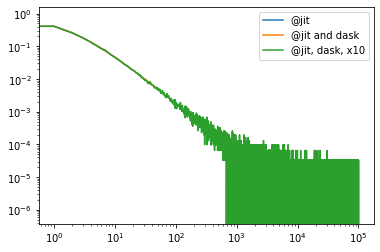

In [9]:
plt.loglog(prob1 / np.linalg.norm(prob1), label = '@jit')
plt.loglog(prob2/ np.linalg.norm(prob1), label ='@jit and dask')
plt.loglog(prob3/np.linalg.norm(prob3), label = '@jit, dask, x10')
plt.legend()
plt.show()